# Discretize OR Binning method in Machine Learning

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.sample(5)

,Survived,Age,Fare
798,0,30.0,7.2292
805,0,31.0,7.7750
588,0,22.0,8.0500
290,1,26.0,78.8500
20,0,35.0,26.0000


In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X.shape

(714, 2)

In [9]:
y.shape

(714,)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=52)

In [11]:
X_train.head(2)

,Age,Fare
851,74.0,7.775
340,2.0,26.000


In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [15]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6288928012519561

In [16]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [17]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [18]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [19]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  7.  , 16.  , 19.  , 21.  , 23.  , 25.  , 27.  , 29.  ,
              31.  , 34.  , 36.  , 41.  , 46.  , 52.  , 80.  ])             ],
      dtype=object)

In [20]:
trf.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(transformers=[('first',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [0]),
                                ('second',
                                 KBinsDiscretizer(encode='ordinal', n_bins=15),
                                 [1])])>

In [21]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [22]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [23]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [24]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
842,30.0,8.0,31.0000,11.0,"(29.0, 31.0]","(30.696, 41.579]"
62,45.0,12.0,83.4750,13.0,"(41.0, 46.0]","(71.0, 93.5]"
10,4.0,0.0,16.7000,8.0,"(0.42, 7.0]","(13.5, 16.7]"
661,40.0,11.0,7.2250,0.0,"(36.0, 41.0]","(0.0, 7.25]"
599,49.0,13.0,56.9292,12.0,"(46.0, 52.0]","(41.579, 71.0]"


In [25]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [26]:
accuracy_score(y_test,y_pred2)

0.6993006993006993

In [27]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.624706572769953

In [28]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6303012519561814


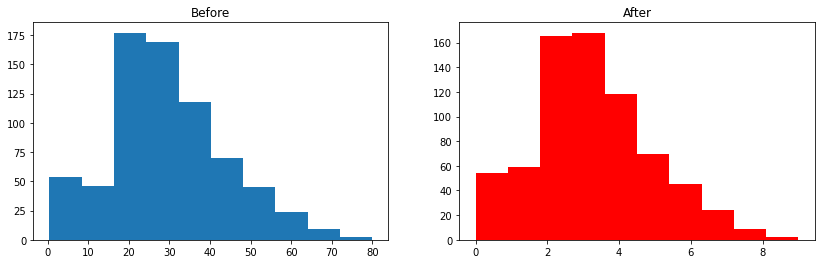

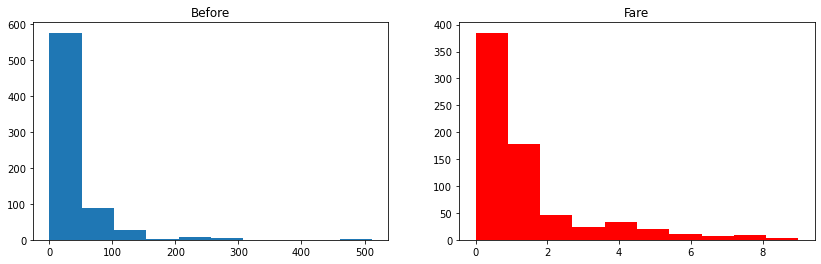

In [29]:
discretize(10,'kmeans')